## Run data pipeline
Returns an aggegrated df to work with

In [33]:
#if needed, clear all previous processing
%reset -f

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/processed/10_sec_processed/HECTORdataAggregated_20240615_1005.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 298658


In [36]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

## Check  Imported Data and Import utilities


In [37]:
# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Number of rows with NaN values: 0
Columns with NaN values: []


In [38]:
raise SystemExit("Stopping execution of  DF IMPORT ")

SystemExit: Stopping execution of  DF IMPORT 

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


START MODELING 

                    MAE           MSE           RMSE        R²
Degree 1  163457.160411  9.651241e+10  310664.469354  0.474080
Degree 2  118219.485631  7.038766e+10  265306.724941  0.616453
Degree 3  117821.650633  6.927660e+10  263204.478703  0.622498


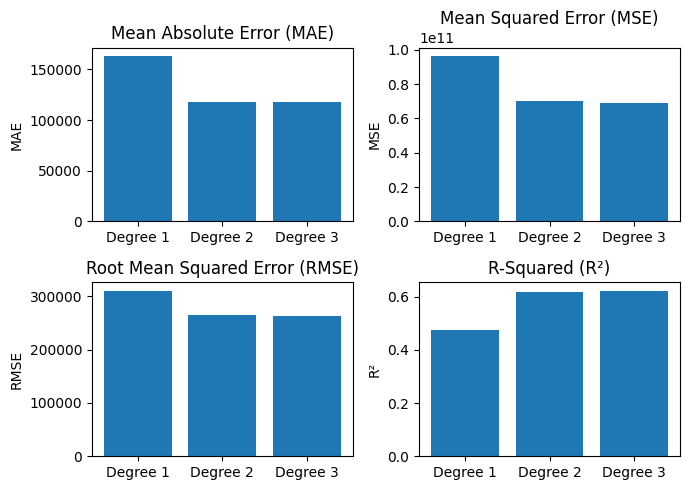

In [39]:
#Polynominal model with all three basic features against target with visualization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2, 3]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()



                    MAE                 MSE           RMSE        R²  \
Degree 1  163457.160411   96512412519.22908  310664.469354   0.47408   
Degree 2  118219.485631   70387658298.86203  265306.724941  0.616453   
Degree 3  117821.650633  69276597609.287842  263204.478703  0.622498   

                          RSS    Adj R²               Model  \
Degree 1  23056277889593480.0  0.474213  LinearRegression()   
Degree 2  16813171344634158.0  0.616575  LinearRegression()   
Degree 3  16542565089264270.0   0.62273  LinearRegression()   

                                                     X_poly  
Degree 1  [[1.0, 11.68125, 4500.0, 11.68125], [1.0, 3.73...  
Degree 2  [[1.0, 11.68125, 4500.0, 11.68125, 136.4516015...  
Degree 3  [[1.0, 11.68125, 4500.0, 11.68125, 136.4516015...  

F-statistic for improvement from 2-degree to 3-degree model: 390.8067
P-value for the F-test: 0.0000


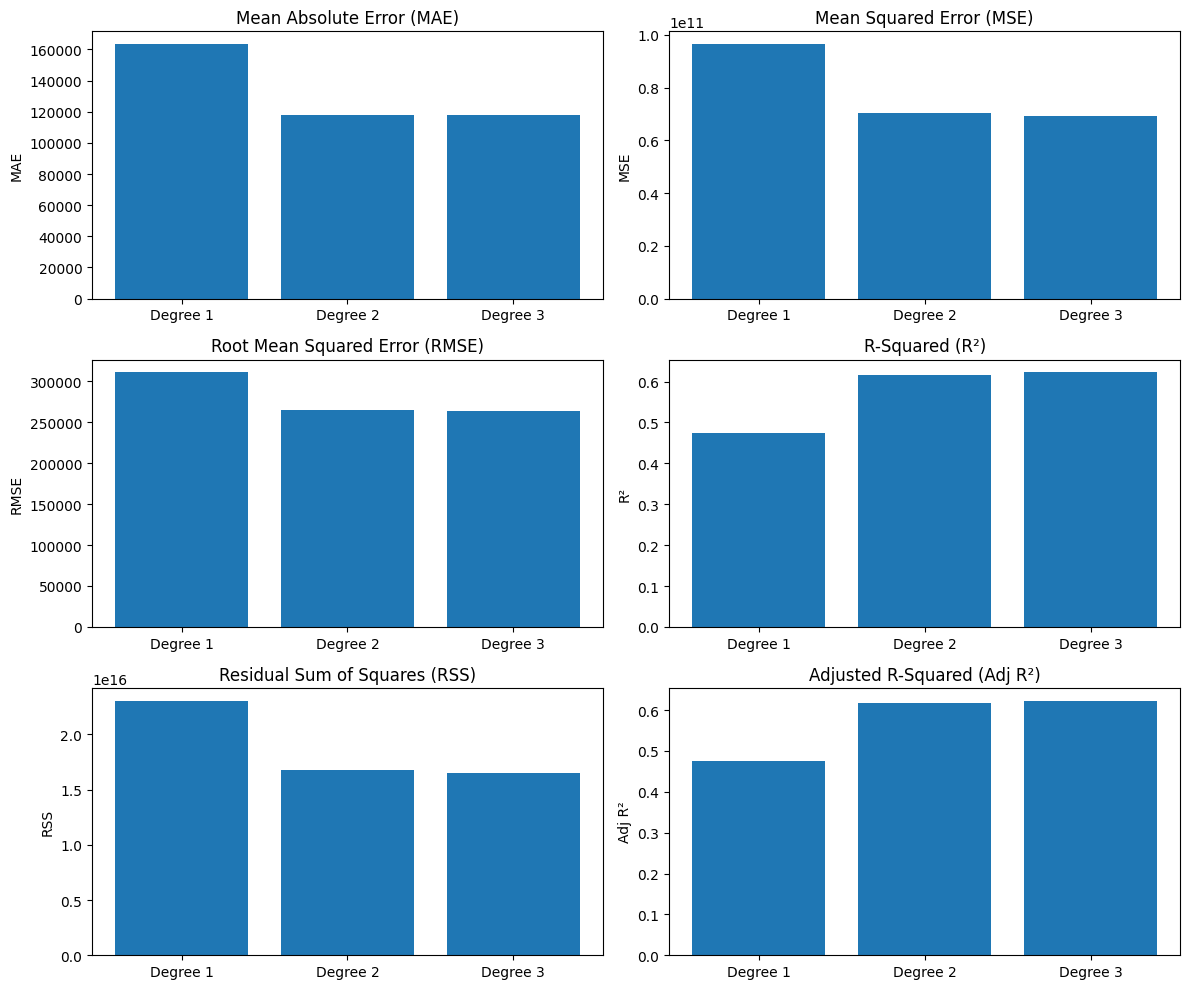

In [40]:
# Polynomial model with all three basic features against target with visualization and statistical tests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import f

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X), poly

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation and additional metrics
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly, poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    # Fit model to calculate RSS and adjusted R²
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    rss = np.sum((y - y_pred) ** 2)
    
    n = len(y)
    k = X_poly.shape[1] - 1  # Number of predictors including polynomial terms
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
    
    # Store model and features for F-test
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores),
        'RSS': rss,
        'Adj R²': adj_r2,
        'Model': model,
        'X_poly': X_poly
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2, 3]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Calculate F-statistic and p-value for improvement from 2-degree to 3-degree
rss_2deg = results['Degree 2']['RSS']
rss_3deg = results['Degree 3']['RSS']
df_2deg = len(y_train) - results['Degree 2']['X_poly'].shape[1]
df_3deg = len(y_train) - results['Degree 3']['X_poly'].shape[1]
df_diff = df_2deg - df_3deg

# Degrees of freedom for the models
df_num = results['Degree 3']['X_poly'].shape[1] - results['Degree 2']['X_poly'].shape[1]
df_denom = df_3deg

# Calculate F-statistic
f_stat = ((rss_2deg - rss_3deg) / df_num) / (rss_3deg / df_denom)

# Calculate p-value from F-statistic
p_value = f.sf(f_stat, df_num, df_denom)

print(f"\nF-statistic for improvement from 2-degree to 3-degree model: {f_stat:.4f}")
print(f"P-value for the F-test: {p_value:.4f}")

# Plotting the results
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

# RSS plot
axes[2, 0].bar(df_results.index, df_results['RSS'])
axes[2, 0].set_title('Residual Sum of Squares (RSS)')
axes[2, 0].set_ylabel('RSS')

# Adjusted R² plot
axes[2, 1].bar(df_results.index, df_results['Adj R²'])
axes[2, 1].set_title('Adjusted R-Squared (Adj R²)')
axes[2, 1].set_ylabel('Adj R²')

plt.tight_layout()
plt.show()


In [41]:
# Calculate F-squared, Given values for R²
r2_2deg = 0.613193  # R² for 2-degree model
r2_3deg = 0.619533  # R² for 3-degree model

# Number of predictors (degree of polynomial + intercept is typically included in the fit)
k_2deg = X_train.shape[1]  # Number of features used in the 2-degree model
k_3deg = X_train.shape[1]  # Number of features used in the 3-degree model (usually the same as k_2deg)

# Using len to get the number of observations (n)
n = len(X_train)

# Print the number of observations
print(f"Number of observations (n): {n}")

# Adjusted R² calculation function
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Calculate Adjusted R² for 2-degree and 3-degree models
adj_r2_2deg = adjusted_r2(r2_2deg, n, k_2deg)
adj_r2_3deg = adjusted_r2(r2_3deg, n, k_3deg)

# Print the Adjusted R² results
print(f"Adjusted R² for 2-degree model: {adj_r2_2deg:.6f}")
print(f"Adjusted R² for 3-degree model: {adj_r2_3deg:.6f}")


Number of observations (n): 238926
Adjusted R² for 2-degree model: 0.613188
Adjusted R² for 3-degree model: 0.619528


In [42]:
#Check if The 3-degree model is significantly better than the 2-degree model.

# Assuming you have X_train, y_train, X_test, y_test already defined
# Define and fit the 2-degree polynomial model
degree_2 = 2
poly_2 = PolynomialFeatures(degree=degree_2, include_bias=False)
X_train_poly_2 = poly_2.fit_transform(X_train)
model_2 = LinearRegression().fit(X_train_poly_2, y_train)

# Define and fit the 3-degree polynomial model
degree_3 = 3
poly_3 = PolynomialFeatures(degree=degree_3, include_bias=False)
X_train_poly_3 = poly_3.fit_transform(X_train)
model_3 = LinearRegression().fit(X_train_poly_3, y_train)

# Calculate RSS for both models
rss_2 = np.sum((y_train - model_2.predict(X_train_poly_2)) ** 2)
rss_3 = np.sum((y_train - model_3.predict(X_train_poly_3)) ** 2)

# Number of observations
n = len(y_train)

# Number of parameters (including intercept)
k_2 = X_train_poly_2.shape[1] + 1  # adding 1 for intercept
k_3 = X_train_poly_3.shape[1] + 1  # adding 1 for intercept

# Calculate the F-statistic
numerator = (rss_2 - rss_3) / (k_3 - k_2)
denominator = rss_3 / (n - k_3)
F_statistic = numerator / denominator

# Degrees of freedom for F-test
df_numerator = k_3 - k_2
df_denominator = n - k_3

# Calculate the p-value
p_value = 1 - f.cdf(F_statistic, df_numerator, df_denominator)

# Output the results
print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Check if the p-value is below a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The 3-degree model is significantly better than the 2-degree model.")
else:
    print("There is no significant difference between the 2-degree and 3-degree models.")


F-statistic: 390.8067
p-value: 0.0000
The 3-degree model is significantly better than the 2-degree model.


                                  MAE           MSE           RMSE        R²
Polynomial Degree 2     118686.334150  7.207568e+10  268469.136396  0.607554
Random Forest           115250.601892  7.395333e+10  271943.609564  0.597205
Gradient Boosting       114766.816792  7.018327e+10  264921.257121  0.617932
Support Vector Machine  192131.105920  2.012482e+11  448606.974330 -0.094580


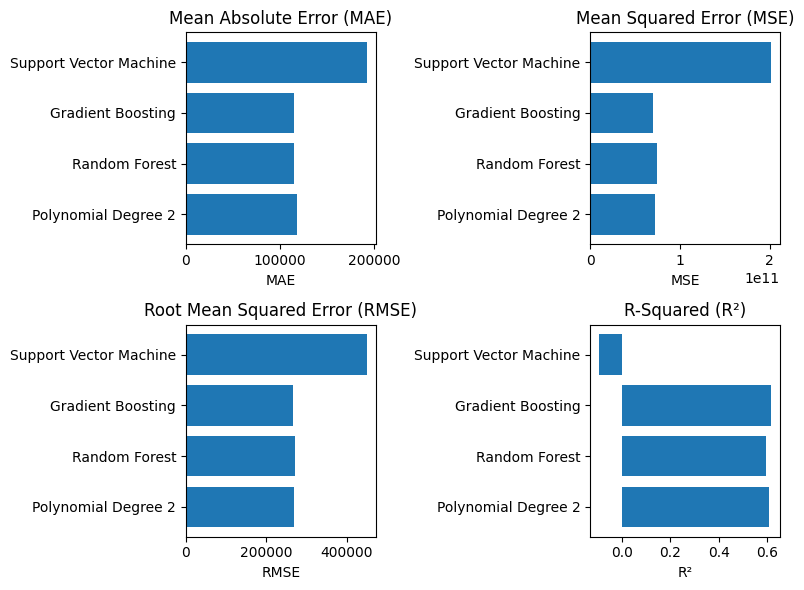

In [43]:
#N-fold cross validation results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Assuming df is your DataFrame already loaded with appropriate data

# Sample a smaller subset if the dataset is very large
df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df
#df_sample=df

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df_sample[features]
y = df_sample[target]

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scoring dictionary
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(model, X, y, cv=5):  # Reduced number of folds to 3
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Initialize results dictionary
results = {}

# Evaluate Polynomial Regression with lower degrees to reduce computational cost
for degree in [2]:
    X_poly = generate_polynomial_features(X, degree)
    poly_model = LinearRegression()
    results[f'Polynomial Degree {degree}'] = evaluate_model_with_cross_validation(poly_model, X_poly, y)

# Evaluate Random Forest with fewer estimators
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced number of estimators to 50
results['Random Forest'] = evaluate_model_with_cross_validation(rf_model, X, y)

# Evaluate Gradient Boosting Machine (GBM) with fewer iterations
gbm_model = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Reduced number of estimators to 50
results['Gradient Boosting'] = evaluate_model_with_cross_validation(gbm_model, X, y)

# Evaluate Support Vector Machine (SVM) with kernel and standardized features
# Standardize the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
results['Support Vector Machine'] = evaluate_model_with_cross_validation(svm_model, X_scaled, y)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# MAE plot
axes[0, 0].barh(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('MAE')

# MSE plot
axes[0, 1].barh(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_xlabel('MSE')

# RMSE plot
axes[1, 0].barh(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_xlabel('RMSE')

# R² plot
axes[1, 1].barh(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_xlabel('R²')

plt.tight_layout()
plt.show()




STOP BASIC MODELING

In [44]:
raise SystemExit("Stopping execution of BASIC MODELING.")

SystemExit: Stopping execution of BASIC MODELING.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [45]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

                                      MAE           MSE           RMSE  \
Base Degree 2               118219.485630  7.038766e+10  265306.724941   
Degree 2 + DistanceKM       118410.125302  6.874935e+10  262200.973192   
Degree 2 + StopOnOff        118478.350185  6.989132e+10  264369.668792   
Degree 2 + ThrottlePerc     116095.036734  4.513745e+10  212455.770196   
Degree 2 + MotorUseCurrent    6788.893435  2.927899e+08   17111.104542   
Degree 2 + CompOnOff        118670.732787  6.989796e+10  264382.219161   
Degree 2 + FC2Current       118538.019039  7.024563e+10  265038.914479   
Degree 2 + FC1Current       118535.357526  7.024595e+10  265039.527140   
Degree 2 + FC3Current       118542.248523  7.024545e+10  265038.580912   
Degree 2 + MotorTemp        119078.790313  7.027411e+10  265092.652796   
Degree 2 + TotalFCPower     118592.248286  7.025697e+10  265060.311253   
Degree 2 + FC1AirFlow       118384.408210  7.033179e+10  265201.417828   
Degree 2 + FC3AirFlow       118371.886

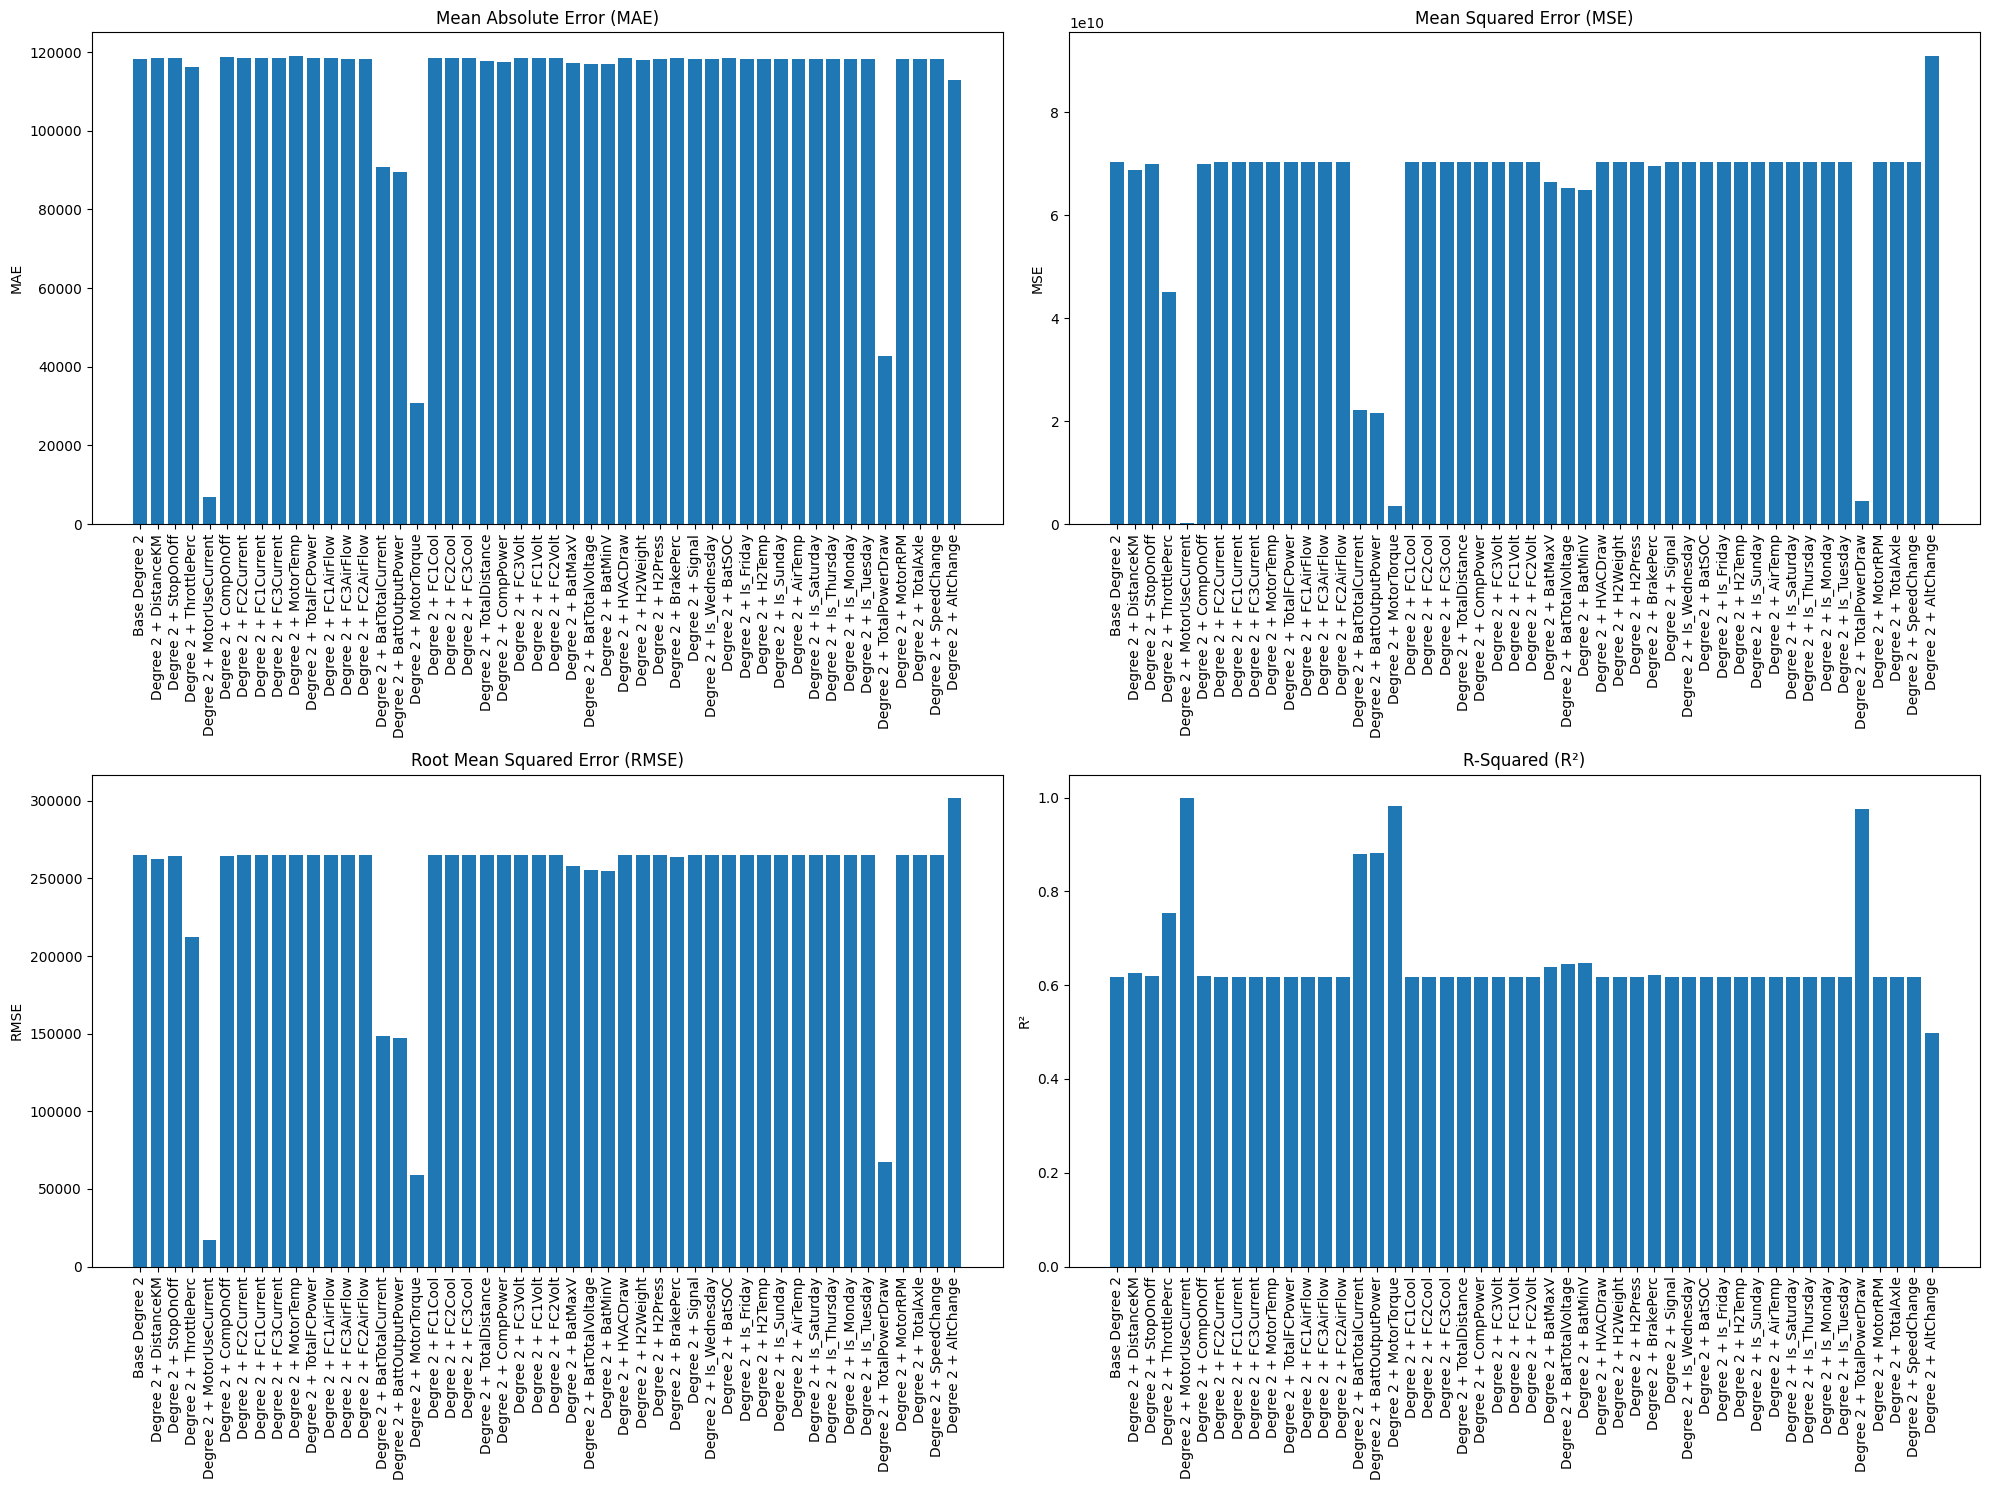

In [46]:
#Check for performance measures MAE, MSE, R-squared agaisnt all other features, add CSV File 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define base features and target
base_features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
additional_features = ['DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC2Current', 'FC1Current','FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow',
       'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower',
       'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV',
       'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press',
       'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday', 'H2Temp',
       'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday', 'Is_Monday',
       'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle', 'SpeedChange','AltChange' ]
target = 'MotorJoules'

# Split data into features and target
X = df[base_features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree=2, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate base model with degree 2
results = {}
results['Base Degree 2'] = evaluate_model_with_cross_validation(X_train, y_train)

# Evaluate models with additional features one by one
for feature in additional_features:
    X = df[base_features + [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    key = f'Degree 2 + {feature}'
    results[key] = evaluate_model_with_cross_validation(X_train, y_train)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

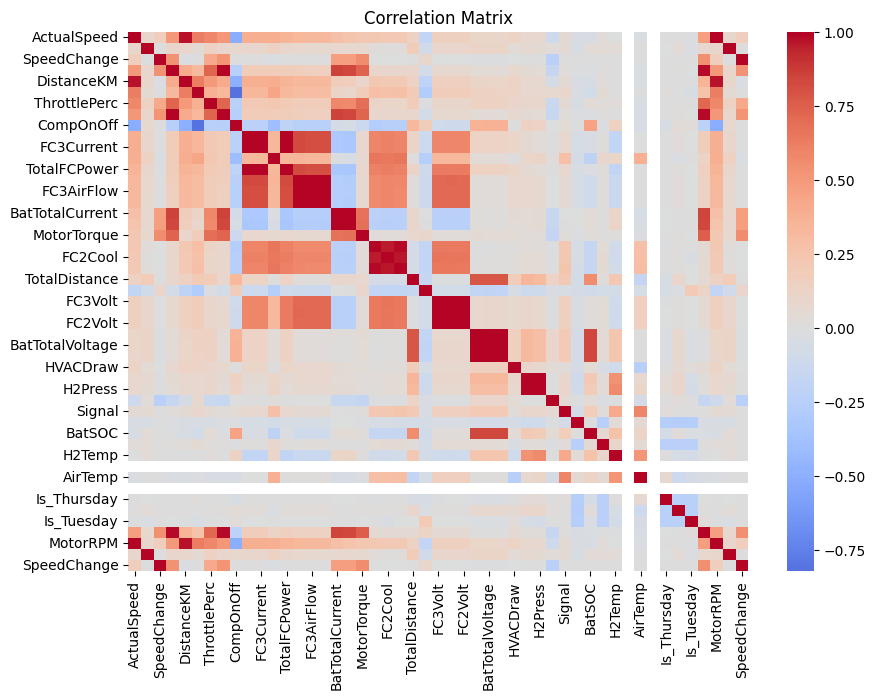

VIF for base features:
       Feature       VIF
0  ActualSpeed  1.721214
1    NetWeight  1.250871
2  SpeedChange  1.434637
3  MotorJoules  2.100158

VIF for base features plus DistanceKM:
       Feature        VIF
0  ActualSpeed  49.422422
1    NetWeight   1.253338
2  SpeedChange   2.687321
3  MotorJoules   2.103539
4   DistanceKM  47.690666

VIF for base features plus StopOnOff:
       Feature       VIF
0  ActualSpeed  2.651156
1    NetWeight  1.325912
2  SpeedChange  1.474451
3  MotorJoules  2.115822
4    StopOnOff  2.366893

VIF for base features plus ThrottlePerc:
        Feature       VIF
0   ActualSpeed  2.074467
1     NetWeight  1.445534
2   SpeedChange  1.453803
3   MotorJoules  2.787813
4  ThrottlePerc  3.405612

VIF for base features plus MotorUseCurrent:
           Feature         VIF
0      ActualSpeed    1.734085
1        NetWeight    1.250873
2      SpeedChange    1.473723
3      MotorJoules  495.834653
4  MotorUseCurrent  493.192033

VIF for base features plus CompOnOff:

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



VIF for base features plus Is_Sunday:
       Feature       VIF
0  ActualSpeed  1.721214
1    NetWeight  1.250871
2  SpeedChange  1.434637
3  MotorJoules  2.100158
4    Is_Sunday       NaN

VIF for base features plus AirTemp:
       Feature       VIF
0  ActualSpeed  1.777389
1    NetWeight  2.024451
2  SpeedChange  1.435476
3  MotorJoules  2.100325
4      AirTemp  1.997829


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



VIF for base features plus Is_Saturday:
       Feature       VIF
0  ActualSpeed  1.721214
1    NetWeight  1.250871
2  SpeedChange  1.434637
3  MotorJoules  2.100158
4  Is_Saturday       NaN

VIF for base features plus Is_Thursday:
       Feature       VIF
0  ActualSpeed  1.732775
1    NetWeight  1.354088
2  SpeedChange  1.434894
3  MotorJoules  2.100159
4  Is_Thursday  1.144269

VIF for base features plus Is_Monday:
       Feature       VIF
0  ActualSpeed  1.728643
1    NetWeight  1.379995
2  SpeedChange  1.435045
3  MotorJoules  2.100360
4    Is_Monday  1.167413

VIF for base features plus Is_Tuesday:
       Feature       VIF
0  ActualSpeed  1.729363
1    NetWeight  1.346468
2  SpeedChange  1.434869
3  MotorJoules  2.100170
4   Is_Tuesday  1.128472

VIF for base features plus TotalPowerDraw:
          Feature        VIF
0     ActualSpeed   1.727786
1       NetWeight   1.338544
2     SpeedChange   1.448113
3     MotorJoules  28.671121
4  TotalPowerDraw  28.700136


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for base features plus MotorRPM:
       Feature       VIF
0  ActualSpeed       inf
1    NetWeight  1.250871
2  SpeedChange  1.434637
3  MotorJoules  2.100158
4     MotorRPM       inf

VIF for base features plus TotalAxle:
       Feature       VIF
0  ActualSpeed  1.828428
1    NetWeight  4.097124
2  SpeedChange  1.437591
3  MotorJoules  2.100268
4    TotalAxle  4.439533


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for base features plus SpeedChange:
       Feature       VIF
0  ActualSpeed  1.721214
1    NetWeight  1.250871
2  SpeedChange       inf
3  MotorJoules  2.100158
4  SpeedChange       inf
Correlation between ActualSpeed and DistanceKM: 0.9677
Correlation between ActualSpeed and StopOnOff: 0.6301
Correlation between ActualSpeed and ThrottlePerc: 0.5780
Correlation between ActualSpeed and MotorUseCurrent: 0.5142
Correlation between ActualSpeed and CompOnOff: -0.5078
Correlation between ActualSpeed and FC2Current: 0.3858
Correlation between ActualSpeed and FC3Current: 0.3857
Correlation between ActualSpeed and MotorTemp: 0.3867
Correlation between ActualSpeed and TotalFCPower: 0.3550
Correlation between ActualSpeed and FC1AirFlow: 0.3266
Correlation between ActualSpeed and FC3AirFlow: 0.3231
Correlation between ActualSpeed and FC2AirFlow: 0.3225
Correlation between ActualSpeed and BatTotalCurrent: 0.2769
Correlation between ActualSpeed and BattOutputPower: 0.2590
Correlation between Ac

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between ActualSpeed and Is_Tuesday: -0.0119
Correlation between ActualSpeed and TotalPowerDraw: 0.4704
Correlation between ActualSpeed and MotorRPM: 1.0000
Correlation between ActualSpeed and TotalAxle: 0.0841
Correlation between ActualSpeed and SpeedChange: 0.1610
Correlation between NetWeight and DistanceKM: 0.0829
Correlation between NetWeight and StopOnOff: 0.0496
Correlation between NetWeight and ThrottlePerc: 0.1432
Correlation between NetWeight and MotorUseCurrent: 0.1021
Correlation between NetWeight and CompOnOff: 0.0699
Correlation between NetWeight and FC2Current: 0.0913
Correlation between NetWeight and FC3Current: 0.0915
Correlation between NetWeight and MotorTemp: 0.1417
Correlation between NetWeight and TotalFCPower: 0.0882
Correlation between NetWeight and FC1AirFlow: 0.0767
Correlation between NetWeight and FC3AirFlow: 0.0752
Correlation between NetWeight and FC2AirFlow: 0.0753
Correlation between NetWeight and BatTotalCurrent: 0.0788
Correlation between Ne

In [47]:
#check correlation and collinearity bewteen extra features and base model parameters and target 
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with appropriate data

data = df

# Define base features and target
base_features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'MotorJoules']
additional_features = ['DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow',
       'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower',
       'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV',
       'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press',
       'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday', 'H2Temp',
       'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday', 'Is_Monday',
       'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle', 'SpeedChange']
target = 'MotorJoules'

# Calculate Pearson correlation matrix
correlation_matrix = df[base_features + additional_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate and print VIF for base features
vif_base = calculate_vif(data[base_features])
print("VIF for base features:")
print(vif_base)

# Save base VIF results to CSV
vif_base.to_csv("vif_base_features.csv", index=False)

# List to store all VIF results
vif_results = []

# Calculate and print VIF for base features plus each additional feature
for feature in additional_features:
    vif_with_feature = calculate_vif(data[base_features + [feature]])
    print(f"\nVIF for base features plus {feature}:")
    print(vif_with_feature)
    
    # Store the results
    vif_with_feature['Included_Feature'] = feature
    vif_results.append(vif_with_feature)

# Combine all VIF results into a single DataFrame
vif_combined = pd.concat(vif_results, ignore_index=True)

# Save combined VIF results to CSV
vif_combined.to_csv("vif_base_and_additional_features.csv", index=False)

# Calculate and print correlations between pairs of base and additional features
correlations = []
for base in base_features:
    for add in additional_features:
        corr_value = data[base].corr(data[add])
        correlations.append({'Base Feature': base, 'Additional Feature': add, 'Correlation': corr_value})
        print(f"Correlation between {base} and {add}: {corr_value:.4f}")

# Convert correlation list to DataFrame
correlation_df = pd.DataFrame(correlations)

# Save correlations to CSV
correlation_df.to_csv("correlations_base_and_additional_features.csv", index=True)

# Optional: Print the list of all correlations
print("\nList of all correlations between base and additional features:")
print(correlation_df)




In [48]:
#Check wehre CSV file is stored
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/joelva/code/pgt-group-3/PGT Shared Notebooks Semester 2


In [49]:
STOP EXECUTING BASE MODEL PERFROMANCE

SyntaxError: invalid syntax (2636481608.py, line 1)

In [ ]:
raise SystemExit("Stopping execution of  STOP EXECUTING MODEL PERFROMANCE.")

In [ ]:
START EXECUTING FINAL POLYNOMINAL MODEL

In [50]:
len(df)

298658

In [ ]:
#Add the 'Operational Characteristics' to the model



           MAE           MSE        RMSE        R²
0  2220.136787  2.053337e+07  4531.37656  0.999888


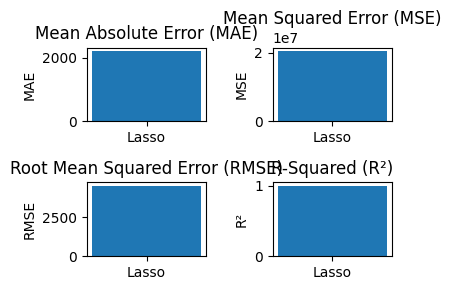


Selected features with Lasso regularization (alpha=10.0):

Features suggested to bring to zero (coefficients close to zero):
        Feature  Coefficient
8    FC2Current         -0.0
9    FC3Current         -0.0
13   FC3AirFlow         -0.0
14   FC2AirFlow         -0.0
17  MotorTorque          0.0
18      FC1Cool          0.0
20      FC3Cool          0.0
25      FC2Volt          0.0
26      BatMaxV          0.0
31      H2Press          0.0
36    Is_Friday         -0.0
38    Is_Sunday          0.0
40  Is_Saturday          0.0
46    TotalAxle          0.0

Retained features after stronger Lasso regularization:
            Feature    Coefficient
0       ActualSpeed  190148.547765
1         NetWeight     106.683933
2        DistanceKM     113.365263
3         StopOnOff    -104.588145
4      ThrottlePerc     512.779955
5   MotorUseCurrent  183024.132060
6         CompOnOff    -803.383641
7        FC1Current    -900.103330
10        MotorTemp      97.643211
11     TotalFCPower    2606.98089

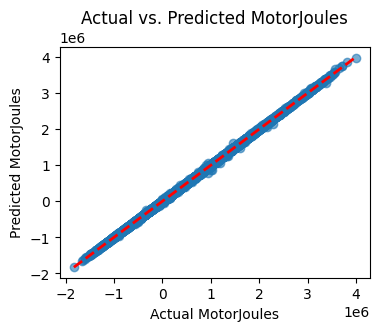

In [51]:
#Run Lasso to determine which feautures to keep in the plolynominal model NEW
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with appropriate data

# Sample a smaller subset of the data if the dataset is very large
df_sample = df#.sample(n=10000, random_state=42) if len(df) > 10000 else df

# Define the target variable
target = 'MotorJoules'

# Automatically select numeric features by excluding the target column and non-numeric columns
features = df_sample.select_dtypes(include=[np.number]).columns.drop(target).tolist()

# Split data into features and target
X = df_sample[features]
y = df_sample[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation using Lasso
def evaluate_model_with_cross_validation(X, y, alpha=10.0, cv=3):  # Increased the alpha to regularize harder
    scaler = StandardScaler()  # Standardize features
    X_scaled = scaler.fit_transform(X)  # Fit and transform the data
    
    model = Lasso(alpha=alpha, max_iter=5000)  # Lasso with higher alpha for stronger regularization
    mae_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')
    
    # Fit the model to analyze coefficients
    model.fit(X_scaled, y)
    coefficients = model.coef_
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores),
        'Coefficients': coefficients,
        'Model': model,
        'Scaler': scaler  # Return the scaler used
    }

# Evaluate model using stronger Lasso regularization
alpha_value = 10.0  # Increased alpha to enforce stronger regularization
result = evaluate_model_with_cross_validation(X_train, y_train, alpha=alpha_value)

# Display results (without coefficients)
metrics = {key: result[key] for key in result if key not in ['Coefficients', 'Model', 'Scaler']}
df_results = pd.DataFrame(metrics, index=[0])
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(4, 3))

# MAE plot
axes[0, 0].bar(['Lasso'], df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Lasso'], df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Lasso'], df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Lasso'], df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Feature selection analysis
print(f"\nSelected features with Lasso regularization (alpha={alpha_value}):")
feature_names = X.columns
selected_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': result['Coefficients']
})

# Identify features with coefficients close to zero
near_zero_threshold = 0.01  # Define a threshold for coefficients close to zero
suggested_to_remove = selected_features[np.abs(selected_features['Coefficient']) < near_zero_threshold]
print("\nFeatures suggested to bring to zero (coefficients close to zero):")
print(suggested_to_remove)

# Features retained by Lasso
retained_features = selected_features[np.abs(selected_features['Coefficient']) >= near_zero_threshold]
print("\nRetained features after stronger Lasso regularization:")
print(retained_features)

# Evaluate the model on the test set
scaler = result['Scaler']
model = result['Model']

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate test set metrics
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print test set metrics
print("\nTest Set Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual MotorJoules')
plt.ylabel('Predicted MotorJoules')
plt.title('Actual vs. Predicted MotorJoules')
plt.show()


FINAL POLYNOMINAL MODEL

In [ ]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

DEFINITIE POLYNOMINAL MODEL

Train MAE: 48403.17500735093
Train MSE: 5380850147.332489
Train RMSE: 73354.278316486
Train R²: 0.9850992626256
Test MAE: 48459.80630499425
Test MSE: 5257828569.092427
Test RMSE: 72510.88586614032
Test R²: 0.9856132582576559


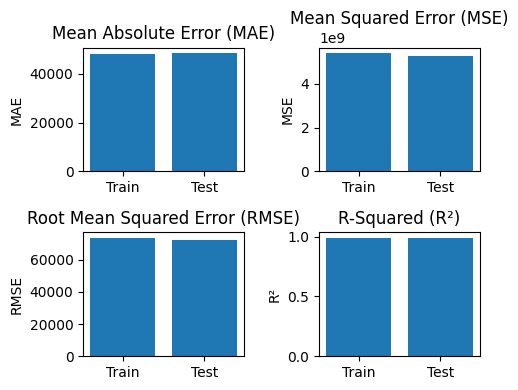

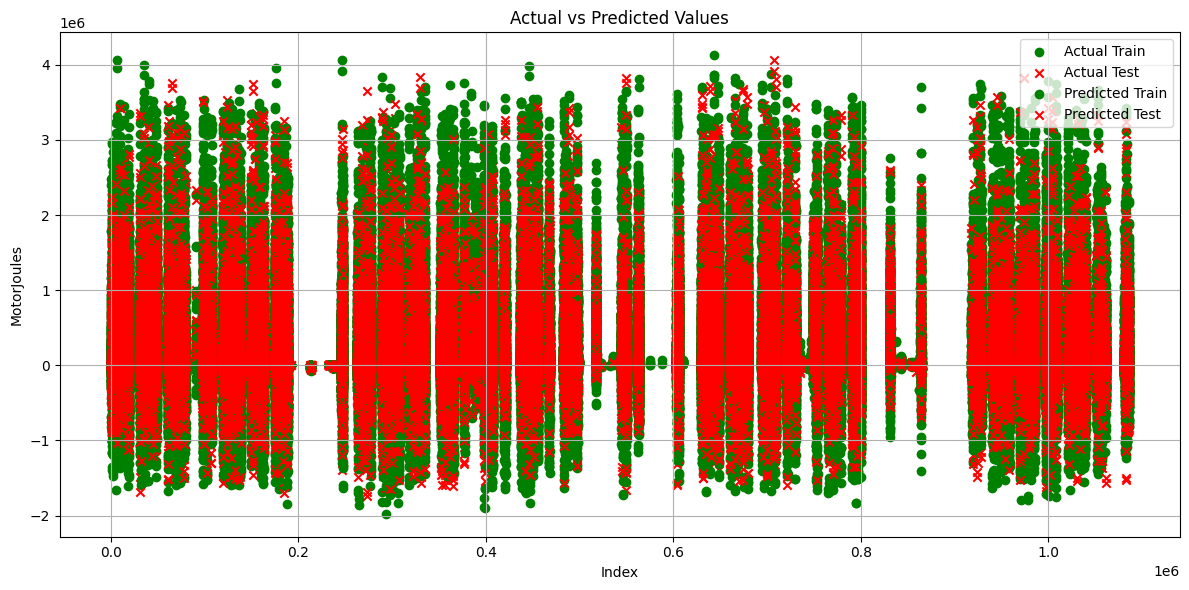

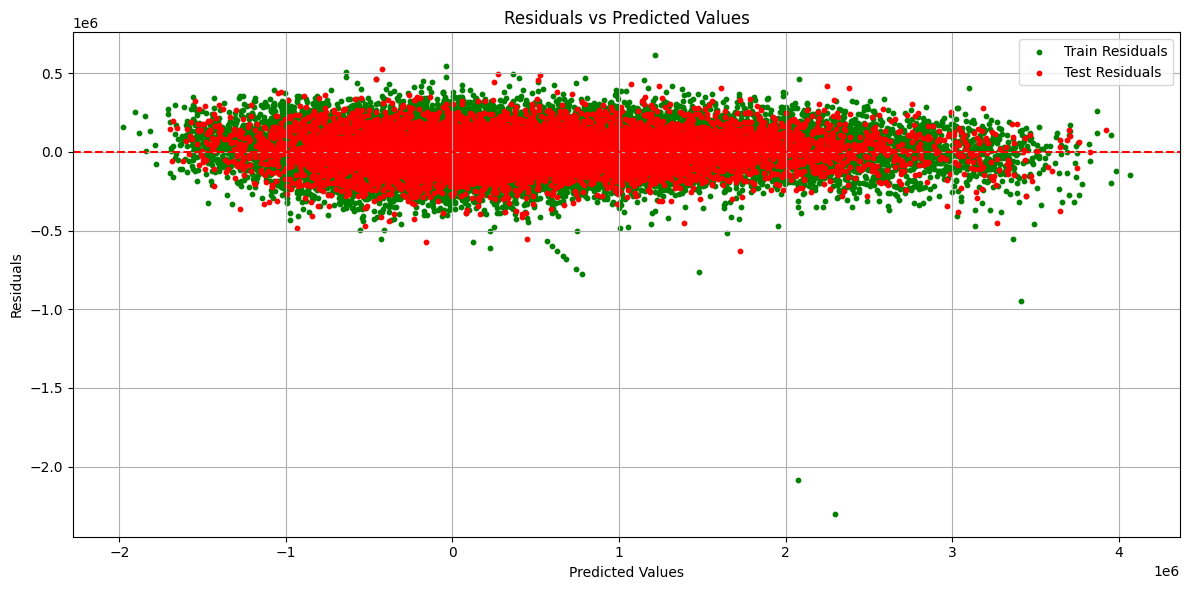

In [ ]:
#Final Model, not regularised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample your dataset if it's too large
#df_sampled = df.sample(n=1000, random_state=42)  # Example for sampling, adjust n as needed

# Define a smaller subset of features to reduce complexity
features = ['MotorTorque','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'MotorTemp', 
 'FC2AirFlow', 
 'CompPower', 
 'FC3Volt', # 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange' 
]
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Use a smaller sample of data if the dataset is very large
# For example, use only 10% of the data or a fixed number of rows
# X, y = X.sample(frac=0.1, random_state=42), y.sample(frac=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

# MAE plot
axes[0, 0].bar(['Train', 'Test'], [mae_train, mae_test])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Train', 'Test'], [mse_train, mse_test])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Train', 'Test'], [rmse_train, rmse_test])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Train', 'Test'], [r2_train, r2_test])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='green', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='red', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='red', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Train MAE: 48414.7800239376
Train MSE: 5367594904.835383
Train RMSE: 73263.87175706307
Train R²: 0.9851584841600926
Test MAE: 48619.29562792213
Test MSE: 5330392316.530444
Test RMSE: 73009.53579177479
Test R²: 0.9854686384304302


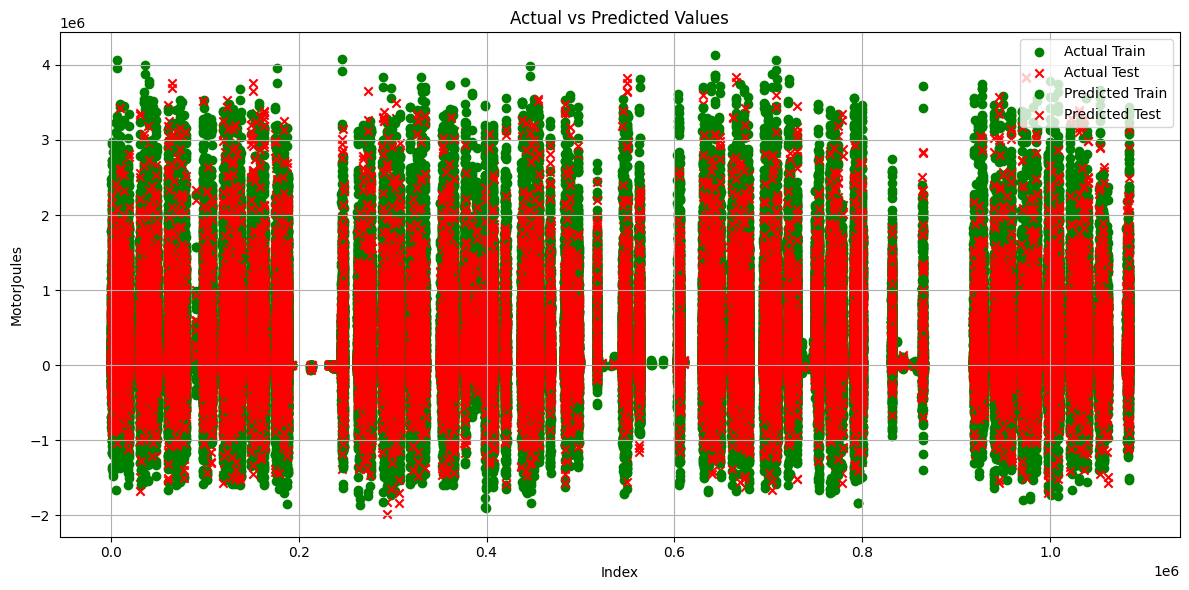

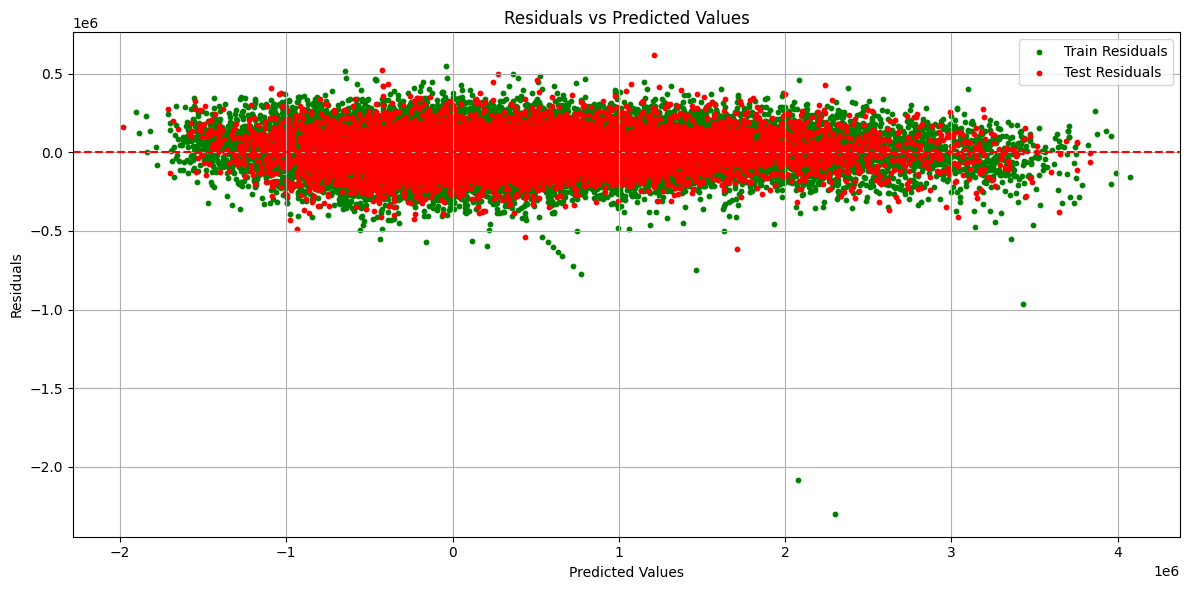

['poly_transformer.pkl']

In [ ]:
#Save the Model as a function NEW

#Final polynominal model, actuals vs predicition and resiudials with date spec
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading models

# Assuming 'df' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2023-08-01'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define a smaller subset of features to reduce complexity
features = [ 'MotorTorque','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'MotorTemp', 
 'FC2AirFlow', 
 'CompPower', 
 'FC3Volt', # 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]

# Use a smaller sample of data if the dataset is very large
# For example, use only 10% of the data or a fixed number of rows
# X, y = X.sample(frac=0.1, random_state=42), y.sample(frac=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='green', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='red', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='red', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)


# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model_v1.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(PolynomialFeatures(degree=degree, include_bias=False), 'poly_transformer.pkl')

In [ ]:
#early stopping training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a smaller subset of features to reduce complexity
features = ['MotorTorque','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'MotorTemp', 
 'FC2AirFlow', 
 'CompPower', 
 'FC3Volt', # 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange' ]
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_val_poly = generate_polynomial_features(X_val_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model with SGDRegressor
# Setting early stopping parameters
model = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures for training, validation, and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Validation MAE: {mae_val}')
print(f'Validation MSE: {mse_val}')
print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# MAE plot
axes[0, 0].bar(['Train', 'Validation', 'Test'], [mae_train, mae_val, mae_test])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Train', 'Validation', 'Test'], [mse_train, mse_val, mse_test])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Train', 'Validation', 'Test'], [rmse_train, rmse_val, rmse_test])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Train', 'Validation', 'Test'], [r2_train, r2_val, r2_test])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()


In [ ]:
#Still in test,, identify features engaged when MotorJoules reaches max
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df is your DataFrame and it is already loaded with appropriate data

# Define features and target
features = ['ThrottlePerc', 'CompOnOff', 'FC2Current', 'FC3Current', 'MotorTemp', 'FC2AirFlow', 'FC1Cool', 
            'FC2Cool', 'CompPower', 'FC3Volt', 'FC2Volt', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press', 
            'BrakePerc', 'BatSOC', 'H2Temp', 'AirTemp', 'H2Perc']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Determine the threshold for the top 5% of MotorJoules
threshold = np.percentile(y, 95)

# Filter the dataset for the top 5% of MotorJoules
X_high = X[y > threshold]
y_high = y[y > threshold]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X), poly

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate polynomial features
degree = 2  # Polynomial degree
X_train_poly, poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly, _ = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Feature Importance Calculation
# Get the names of the polynomial features
poly_feature_names = poly.get_feature_names_out(features)

# Get the coefficients of the polynomial features
coefficients = model.coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefficients
})

# Aggregate the absolute values of coefficients for each original feature
feature_importance['Original Feature'] = feature_importance['Feature'].apply(lambda x: x.split('_')[0])
importance_by_feature = feature_importance.groupby('Original Feature')['Coefficient'].apply(lambda x: np.sum(np.abs(x))).reset_index()

# Sort the features by their importance
importance_by_feature = importance_by_feature.sort_values(by='Coefficient', ascending=False)

# Print the sorted list of feature importances
print("\nFeature Importances for Top 5% MotorJoules:")
print(importance_by_feature)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_by_feature['Original Feature'], importance_by_feature['Coefficient'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Top 5% MotorJoules')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


Code used testing and exploring, not used in the final report

In [ ]:
#Check for overfit risk for 2 and 3 egree polynominal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle

# Assuming 'df' is your DataFrame already loaded with appropriate data

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Function to evaluate model performance
def evaluate_model(X_train, X_test, y_train, y_test, degree):
    X_train_poly = generate_polynomial_features(X_train, degree)
    X_test_poly = generate_polynomial_features(X_test, degree)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate performance metrics
    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'RSS': np.sum((y_test - y_test_pred) ** 2)  # Residual Sum of Squares
    }
    
    return metrics

# Evaluate models with degrees 2 and 3
metrics_2deg = evaluate_model(X_train, X_test, y_train, y_test, degree=2)
metrics_3deg = evaluate_model(X_train, X_test, y_train, y_test, degree=3)

# Display results
print("2-Degree Polynomial Model Performance:")
for metric, value in metrics_2deg.items():
    print(f"{metric}: {value:.4f}")

print("\n3-Degree Polynomial Model Performance:")
for metric, value in metrics_3deg.items():
    print(f"{metric}: {value:.4f}")

# Plotting Learning Curves
def plot_learning_curve(X, y, degree):
    train_sizes = np.linspace(0.1, 0.9, 5)  # Use 10% to 90% of data for training
    train_errors = []
    val_errors = []

    for train_size in train_sizes:
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=42)
        
        X_train_poly = generate_polynomial_features(X_train, degree)
        X_val_poly = generate_polynomial_features(X_val, degree)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        train_pred = model.predict(X_train_poly)
        val_pred = model.predict(X_val_poly)
        
        train_errors.append(mean_squared_error(y_train, train_pred))
        val_errors.append(mean_squared_error(y_val, val_pred))
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
    plt.plot(train_sizes, val_errors, label='Validation Error', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curve (Degree {degree} Polynomial)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for 2-degree and 3-degree polynomial models
plot_learning_curve(X, y, degree=2)
plot_learning_curve(X, y, degree=3)

# Calculate the F-statistic to compare 2-degree and 3-degree models
def calculate_f_statistic(r2_1, r2_2, n, k1, k2):
    numerator = ((r2_2 - r2_1) / (k2 - k1))
    denominator = ((1 - r2_2) / (n - k2 - 1))
   


In [ ]:
#Polynominal Model including all available features 

#Polynominal model with all three basic features against target with visualization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange',  'MotorRPM', 
 'StopOnOff', 
 'ThrottlePerc',  'CompOnOff', 
 'FC2Current', 
 'FC3Current', 
 'FC1Current', 
 'MotorTemp', 
 'TotalFCPower', 
 'FC1AirFlow', 
 'FC3AirFlow', 
 'FC2AirFlow', 
 'BatTotalCurrent', 
 'BattOutputPower', 'MotorTorque', 
 'FC1Cool', 
 'FC2Cool', 
 'FC3Cool',  'CompPower', 
 'FC3Volt', 
 'FC1Volt', 
 'FC2Volt', 
 'BatMaxV', 
 'BatTotalVoltage', 
 'BatMinV', 
 'HVACDraw',  'BrakePerc', 
 'Signal',  'Is_Wednesday', 
 'BatSOC', 
 'Is_Friday', 
 'H2Temp', 
 'AltChange', 
 'Is_Sunday', 
 'AirTemp', 
 'Is_Saturday', 
 'Is_Thursday', 
 'Is_Monday', 
 'Is_Tuesday',  'H2Perc', 
 'DistanceKM'
]
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()



In [ ]:
#Test the model with linear regress+Lasso on base features NEW

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation using Lasso
def evaluate_model_with_cross_validation(X, y, alpha=0.1, cv=5):
    scaler = StandardScaler()  # Standardize features
    X_scaled = scaler.fit_transform(X)  # Fit and transform the data
    
    model = Lasso(alpha=alpha, max_iter=10000)  # Lasso with specified alpha
    mae_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')
    
    # Fit the model to analyze coefficients
    model.fit(X_scaled, y)
    coefficients = model.coef_
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores),
        'Coefficients': coefficients,
        'Model': model,
        'Scaler': scaler  # Return the scaler used
    }

# Evaluate model using Lasso regularization
alpha_value = 0.1  # Adjust alpha to control the regularization strength
result = evaluate_model_with_cross_validation(X_train, y_train, alpha=alpha_value)

# Display results (excluding the coefficients, model, and scaler)
metrics = {key: result[key] for key in result if key not in ['Coefficients', 'Model', 'Scaler']}
df_results = pd.DataFrame([metrics])
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# MAE plot
axes[0, 0].bar(['Lasso'], df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Lasso'], df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Lasso'], df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Lasso'], df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Feature selection analysis
print(f"\nSelected features with Lasso regularization (alpha={alpha_value}):")
feature_names = X.columns
selected_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': result['Coefficients']
})
print(selected_features[selected_features['Coefficient'] != 0])

# Evaluate the model on the test set
scaler = result['Scaler']
model = result['Model']

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate test set metrics
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print test set metrics
print("\nTest Set Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(3, 2))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual MotorJoules')
plt.ylabel('Predicted MotorJoules')
plt.title('Actual vs. Predicted MotorJoules')
plt.show()


In [ ]:
#Polynominal Base Model with identifyed additional features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define base features and additional features
base_features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
additional_features = [ 'StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'FC2Current', 
 'FC3Current', 
 'MotorTemp', 
 'FC1AirFlow', 
 'FC2AirFlow', 
 'FC1Cool', 
 'FC2Cool', 
 'TotalDistance', 
 'CompPower', 
 'FC3Volt', 
 'FC2Volt', 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc']
target = 'MotorJoules'

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Function to evaluate model
def evaluate_model(X_train, X_test, y_train, y_test, degree=3):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Generate polynomial features
    X_train_poly = generate_polynomial_features(X_train_scaled, degree)
    X_test_poly = generate_polynomial_features(X_test_scaled, degree)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate performance measures
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE_Train': mae_train,
        'MSE_Train': mse_train,
        'RMSE_Train': rmse_train,
        'R²_Train': r2_train,
        'MAE_Test': mae_test,
        'MSE_Test': mse_test,
        'RMSE_Test': rmse_test,
        'R²_Test': r2_test
    }

# Prepare the dataframe to store the results
results = {}

# Evaluate the base model
X = df[base_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results['Base Model'] = evaluate_model(X_train, X_test, y_train, y_test)

# Evaluate models with additional features one by one
for feature in additional_features:
    X = df[base_features + [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    key = f'Base + {feature}'
    results[key] = evaluate_model(X_train, X_test, y_train, y_test)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Save results to CSV
df_results.to_csv('polynomial_model_comparison.csv', index=True)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE_Test'], label='Test', alpha=0.7)
axes[0, 0].bar(df_results.index, df_results['MAE_Train'], label='Train', alpha=0.7)
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].legend()

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE_Test'], label='Test', alpha=0.7)
axes[0, 1].bar(df_results.index, df_results['MSE_Train'], label='Train', alpha=0.7)
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].legend()

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE_Test'], label='Test', alpha=0.7)
axes[1, 0].bar(df_results.index, df_results['RMSE_Train'], label='Train', alpha=0.7)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].legend()

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²_Test'], label='Test', alpha=0.7)
axes[1, 1].bar(df_results.index, df_results['R²_Train'], label='Train', alpha=0.7)
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#Final model, trained with k-fold to avoid overfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# Define a smaller subset of features to reduce complexity
features = ['MotorTorque','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'MotorTemp', 
 'FC2AirFlow', 
 'CompPower', 
 'FC3Volt', # 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange' ]
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Define the polynomial degree
degree = 2

# Initialize k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create a pipeline that generates polynomial features, scales them, and applies Lasso regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

# Evaluate the model using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive values
cv_scores = -cv_scores

# Print the cross-validation scores and their mean
print(f'Cross-validation MSE scores: {cv_scores}')
print(f'Mean cross-validation MSE: {np.mean(cv_scores)}')

# Optionally, train the final model on the full dataset for use
pipeline.fit(X, y)

# Make predictions with the final model
y_pred = pipeline.predict(X)

# Calculate and print performance measures
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'Final Model Performance on Full Data:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')



In [ ]:
#find the best value for k-fold
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


features = ['MotorTorque','StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'MotorTemp', 
 'FC2AirFlow', 
 'CompPower', 
 'FC3Volt', # 
 'BatMinV', 
 'HVACDraw', 
 'H2Weight', 
 'H2Press', 
 'BrakePerc', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange' 
]
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Define a range of k values to test
k_values = range(2, 21)

# Initialize lists to store results
mean_scores = []
std_scores = []

# Loop over k values
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = Lasso(alpha=0.1)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(-scores))
    std_scores.append(np.std(-scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', label='Mean CV MSE')
plt.fill_between(k_values, np.array(mean_scores) - np.array(std_scores), 
                 np.array(mean_scores) + np.array(std_scores), alpha=0.2, color='blue')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean CV MSE')
plt.title('Determining the Optimal Number of Folds in K-Fold CV')
plt.legend()
plt.grid(True)
plt.show()
